# Статистический анализ данных сервиса аренды самокатов GoFast

<h2>Содержание</h2>

<ul>
    <li><a href="#step_1">Введение</a></li>
    <li><a href="#step_2">Изучение общей информации о данных</a></li>
    <li><a href="#step_3">Предобработка данных</a>
    <ul>
        <li><a href="#step_3_1">Приведение столбца <code>date</code> к типу даты pandas</a></li>
        <li><a href="#step_3_2">Cоздание нового столбца с номером месяца на основе столбца <code>date</code></a></li>
        <li><a href="#step_3_3">Проверка и обработка пропущенных значений и дубликатов в датафреймах</a></li>
        <li><a href="#step_3_4">Вывод</a></li>
        </ul></li>
    <li><a href="#step_4"> Описание и визуализация информации о пользователях и поездках:</a>
    <ul>
        <li><a href="#step_4_1">Частота встречаемости городов</a></li>
        <li><a href="#step_4_2">Cоотношение пользователей с подпиской и без подписки</a></li>
        <li><a href="#step_4_3">Возраст пользователей</a></li>
        <li><a href="#step_4_4">Расстояние, которое пользователь преодолел за одну поездку</a></li>
        <li><a href="#step_4_5">Продолжительность поездок</a></li>
    </ul></li>
    <li><a href="#step_5">Объединение данных</a>
    <ul>
        <li><a href="#step_5_1">Объединение данных о пользователях, поездках и подписках в один датафрейм.</a></li>
        <li><a href="#step_5_2">Создание датафреймов на основе объединённого</a>: 
            <ul>
                <li><a href="#step_5_2_1">c данными о пользователях без подписки</a></li>
                <li><a href="#step_5_2_2">с данными о пользователях с подпиской</a></li></ul></li>
        <li><a href="#step_5_3">Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий</a></li>
        <li><a href="#step_5_4">Выводы</a></li>
    </ul></li>
    <li><a href="#step_6">Подсчёт выручки</a></li>
    <li><a href="#step_7">Проверка гипотез</a></li>
    <li><a href="#step_8">Распределения</a></li>
    <li><a href="#step_9">Выводы</a></li>
</ul>

<a id='step_1'></a>

## Введение

**Краткое описание проекта**: В нашем распоряжении данные сервиса аренды самокатов GoFast, которые содержат информацию о некоторых пользователях из нескольких городов, а также данные о поездках этих пользователей. Требуется проверить некоторые гипотезы, которые помогут бизнесу вырасти. 
<p>Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:</p>
<ul>
    <li>без подписки<ul>
        <li>абонентская плата отсутствует;</li>
        <li>стоимость одной минуты поездки — 8 &#8381;;</li>
        <li>стоимость старта (начала поездки) — 50 &#8381;;</li></ul></li>
    <li>с подпиской Ultra<ul>
        <li>абонентская плата — 199 &#8381;/мес;</li>
        <li>стоимость одной минуты поездки — 6 &#8381;;</li>
        <li>стоимость старта — бесплатно.</li></ul></li></ul>

**Цель проекта**: Проверить следующие гипотезы:  
1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров? 
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Они хотят убедиться, что благодаря этому количество обращений в техподдержку значительно снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления серверов и после обновления. **Какой тест понадобился бы для проверки этой гипотезы?**

&star; **Доп. задание №1**: Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.   
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

&star; **Доп. задание №2**: Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших их клиентов. Отдел планирует разослать 11 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

<a id='step_2'></a>
## Изучение общей информации о данных

Импортируем все библиотеки, необходимые для исследования.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st
from math import factorial, sqrt
from scipy.stats import binom, norm

Считываем .CSV-файлы в датафреймы: 
<ul>
    <li>users_go.csv &#8594; <code>users_go</code></li>
    <li>rides_go.csv &#8594; <code>rides_go</code></li>
    <li>subscriptions_go.csv &#8594; <code>subscriptions_go</code></li>
</ul>    

### `users_go`

In [2]:
try:
    users_go = pd.read_csv('/datasets/users_go.csv')
except:
    users_go = pd.read_csv('https://datasets/users_go.csv')
users_go.info()
users_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


В датафрейме `users_go` содержится 1565 строк с информацией об идентификаторе, имени, возрасте, городе, а также типе подписки пользователя. Типы данных столбцов корректны (`object` для имени, города и типа подписки, `int64` для идентификатора и возраста пользователя). В ответе метода `info()` не указано, что в датафрейме содержатся пропущенные значения, однако нельзя исключать наличие &laquo;значений-заглушек&raquo;. Рассмотрим их подробнее на этапе предобработки данных.

### `rides_go`

In [3]:
try:
    rides_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
except:
    rides_go = pd.read_csv('https://datasets/rides_go.csv', parse_dates=['date'])
rides_go.info()
rides_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


В датафрейме `rides_go` содержится 18 068 строк. Типы данных столбцов корректны для столбцов `user_id`, `distance` и `duration `, тип данных `date` нужно скорретировать `object` -> `date64`. В ответе метода `info()` не указано, что в датафрейме содержатся пропущенные значения, однако нельзя исключать наличие &laquo;значений-заглушек&raquo;. Рассмотрим их подробнее на этапе предобработки данных.

### `subscriptions_go`

In [4]:
try:
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions_go = pd.read_csv('https://datasets/subscriptions_go.csv')
subscriptions_go.info()
subscriptions_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В датафрейме `subscriptions_go` содержатся 2 строки. Типы данных корректны для всех столбцов (`object` для типа подписки и `int64` для стоимости одной минуты поездки по данной подписке, стоимости начала поездки, стоимости ежемесячного платежа). Пропущенных значений нет, датафрейм соответствует условиям подписки.

<a id='step_3'></a>
## Предобработка данных

<a id='step_3_2'></a>
### Создание нового столбца с номером месяца на основе столбца `date`

Прежде, чем создавать новый столбец, проверим, сколько лет охватывают предоставленные данные.

In [5]:
pd.DatetimeIndex(rides_go['date']).year.unique()

Index([2021], dtype='int32', name='date')

В датафрейме пристутствуют только данные за 2021 год. Так как нет опасности объединения даннных за разные годы, можем добавить столбец, который будет содержать только номер месяца (тип `int64`).

In [6]:
rides_go['date_month'] = pd.DatetimeIndex(rides_go['date']).month
rides_go.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Новый столбец с номером месяца добавлен успешно.

<a id='step_3_3'></a>
### Проверка наличия пропущенных значений и дубликатов в датафреймах. 

Исследуем каждый датафрейм на наличие явных/неявных дубликатов, а также на наличие пропущенных значений. 

#### `users_go`

Проверим, сколько явных дубликатов содержит датафрейм `user_go`:

In [7]:
print("Количество явных дубликатов:", users_go.duplicated().sum())

Количество явных дубликатов: 31


Удалим строки-дубликаты, за исключением первого вхождения.

In [8]:
users_go = users_go.drop_duplicates(keep='first')
print("Количество явных дубликатов:", users_go.duplicated().sum())

Количество явных дубликатов: 0


In [9]:
users_go.info()
print("Минимальное значение user_id:", users_go['user_id'].min())
print("Максимальное значение user_id:", users_go['user_id'].max())

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB
Минимальное значение user_id: 1
Максимальное значение user_id: 1534


После удаления дубликатов в столбце осталось 1534 строки. Минимальный идентификатор пользователя &mdash; 1, а максимальный &mdash; 1534. Из этого можем сделать вывод, что в дата-фрейме находится информация об 1534 уникальных пользователях.  

Проверим другие столбцы на наличие &laquo;значений-заглушек&raquo; и неявных дубликатов:

In [10]:
users_go['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

Столбец `name` в полном порядке. Не было обнаружено никаких странных наборов символов вместо имени пользователя.

In [11]:
users_go['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

Минимальный возраст пользователя сервиса в пердоставленной выборке &mdash; 12 лет, а максимальный &mdash; 43 года. Аномальных значений (отрицательных, неправдоподобно малых или больших) не обнаружено.

*В данный момент в правовых документах различных сервисов аренды электросамокатов указано, что договор об аренде может заключить только лицо, достигнувшее возраста совершеннолетия. Не уверенна, можно ли брать в работу эти данные, на всякий случай обращаю на них внимание.*

In [12]:
users_go.query('age < 18')

,user_id,name,age,city,subscription_type
20,21,Святогор,14,Ростов-на-Дону,ultra
33,34,Федор,17,Краснодар,ultra
34,35,Руслан,12,Пятигорск,ultra
48,49,Одиссей,17,Ростов-на-Дону,ultra
66,67,Анастасия,12,Ростов-на-Дону,ultra
...,...,...,...,...,...
1474,1475,Артём,17,Тюмень,free
1475,1476,Стефания,13,Москва,free
1476,1477,Ян,17,Сочи,free
1487,1488,Рамиль,15,Екатеринбург,free


In [13]:
users_go['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

В датафрейме содержится информация о пользователях из 8 городов: Екатеринбург, Краснодар, Москва, Омск, Пятигорск, Ростов-на-Дону, Сочи и Тюмень. **Неявных дубликатов среди названий городов не выявлено**.

In [14]:
users_go['subscription_type'].sort_values().unique()

array(['free', 'ultra'], dtype=object)

Столбец `subscription_type` содержит всего два вида знаечний: `free`, `ultra`. Ошибки нет, эти значения &mdash; названия подписок.

#### `rides_go`

In [15]:
print("Количество явных дубликатов:", rides_go.duplicated().sum())

Количество явных дубликатов: 0


В датафрейме отстуствуют явные дубликаты.

In [16]:
print("Количество уникальных значений:", len(rides_go['user_id'].unique()))
print("Минимальное значение user_id:", rides_go['user_id'].min())
print("Максимальное значение user_id:", rides_go['user_id'].max())

Количество уникальных значений: 1534
Минимальное значение user_id: 1
Максимальное значение user_id: 1534


В столбце `user_id` содержится идентификатор пользователя, совершившего поездку. Минимальное значение идентификатора &mdash; 1, а максимальное &mdash; 1534, всего 1534 уникальных целочисленных значений. Значения в столбце не должны быть уникальными, так как пользователь может совершить несколько поездок.

In [17]:
print("Минимальное значение distance:", rides_go['distance'].min())
print("Максимальное значение distance:", rides_go['distance'].max())

Минимальное значение distance: 0.855682925681208
Максимальное значение distance: 7211.007744598519


Минимальное расстояние, которое пользователь проехал в текущей сессии &mdash; 85 cм (возможно, столкнулся с какой-то проблемой  с самокатом на моменте начала аренды и завершил сессию). Самая длинная поездка &mdash; 7211 м. Никаких значений-заглушек для пропущенных значений не обнаружено.

In [18]:
print("Минимальное значение duration:", rides_go['duration'].min())
print("Максимальное значение duration:", rides_go['duration'].max())
rides_go['duration'].value_counts()

Минимальное значение duration: 0.5
Максимальное значение duration: 40.82396261922424


duration
0.500000     95
25.599769     1
30.932438     1
12.061496     1
15.615504     1
             ..
19.867203     1
23.133186     1
26.146245     1
25.645333     1
15.893917     1
Name: count, Length: 17974, dtype: int64

Обнаружено 95 строк с сессиями длиной в 30 секунд. 

In [19]:
rides_go.query('duration==0.5')

,user_id,distance,duration,date,date_month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Выше представлены некоторые записи сверхкоротких поездок: пользователи проезжали по нескольку километров, что за такое короткое время невозможно. Никаких общих значений в других столбцах не выявлено.

In [20]:
print("Минимальное значение date:", rides_go['date'].min())
print("Максимальное значение date:", rides_go['date'].max())

Минимальное значение date: 2021-01-01 00:00:00
Максимальное значение date: 2021-12-30 00:00:00


<a id='step_3_4'></a>
### Вывод

В датафрейме `users_go` были обнаружены явные дубликаты. Эти строки были удалены из датафрейма, за исключением первого вхождения. Всего в выборке находится информация о 1534 пользователях. Минимальный возраст пользователя сервиса в пердоставленной выборке &mdash; 12 лет, а максимальный &mdash; 43 года. В выборке представлены данные о пользователях из 8 городов: Екатеринбург, Краснодар, Москва, Омск, Пятигорск, Ростов-на-Дону, Сочи и Тюмень.

<a id='step_4'></a>
## Исследовательский анализ данных

<a id='step_4_1'></a>
### Частота встречаемости городов

С помощью сводной таблицы подсчитаем количество пользователей в каждом городе, и на её основе построим столбчатую диаграмму:

,count
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


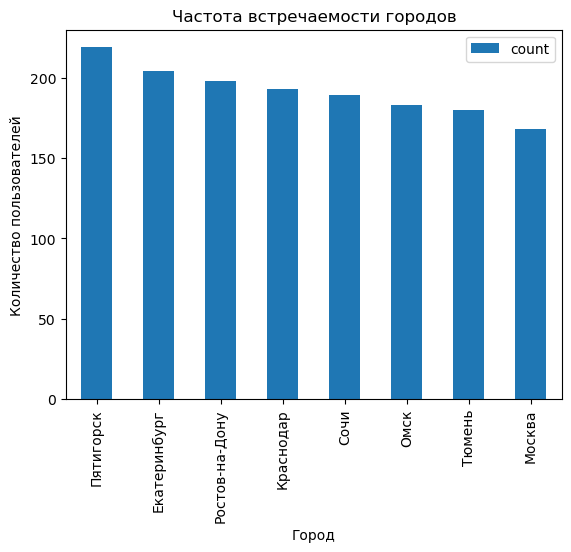

In [21]:
user_city = users_go.pivot_table(index='city', values='user_id', aggfunc='count')
user_city.columns = ['count']
user_city = user_city.sort_values(by='count', ascending=False)

user_city.plot(y = 'count', kind='bar')
plt.ylabel("Количество пользователей")
plt.xlabel("Город");
plt.title("Частота встречаемости городов");

user_city

**Больше всего** пользователей находится **в городе Пятигорске**. **Наименьшее количество пользователей** из выборки находится **в Москве**. По тому, как представлено распределение пользователей по городам, можно сделать вывод, что для исследования предоставлена **достаточно гармоничная выборка**.

<a id='step_4_2'></a>
### Cоотношение пользователей с подпиской и без подписки

По аналогии с п. 5.1 подсчитаем количество пользователей с подпиской и без подписки. 

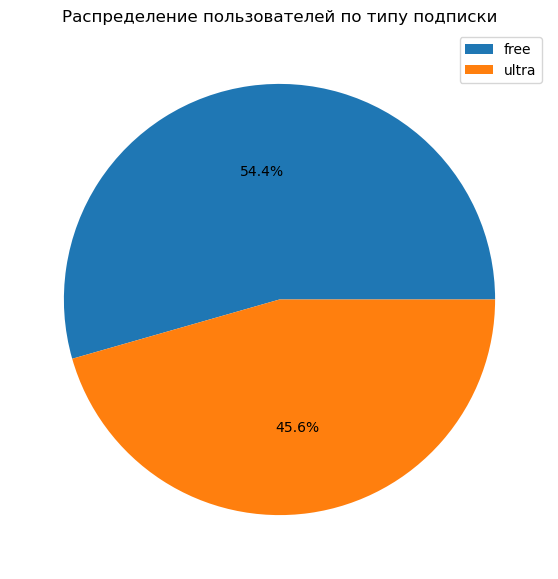

In [22]:
user_subscription_type = users_go.pivot_table(index='subscription_type', values='user_id', aggfunc=['count'])
user_subscription_type.columns = ['count']
#user_subscription_type['share'] = round((user_subscription_type['count']/len(users_go['subscription_type']))*100,1)

user_subscription_type.plot(y = 'count', kind='pie', autopct='%1.1f%%', figsize=(7,7), labels=None, ylabel="")
plt.title("Распределение пользователей по типу подписки");

Доля пользователей с подпиской "**free**" составляет **54,4%** от выборки. Соответственно, подписчиков "**ultra**" &mdash; **45,6**%.

<a id='step_4_3'></a>
### Возраст пользователей

Определим основные описательные характеристики выборки и построим гистограмму.

In [23]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

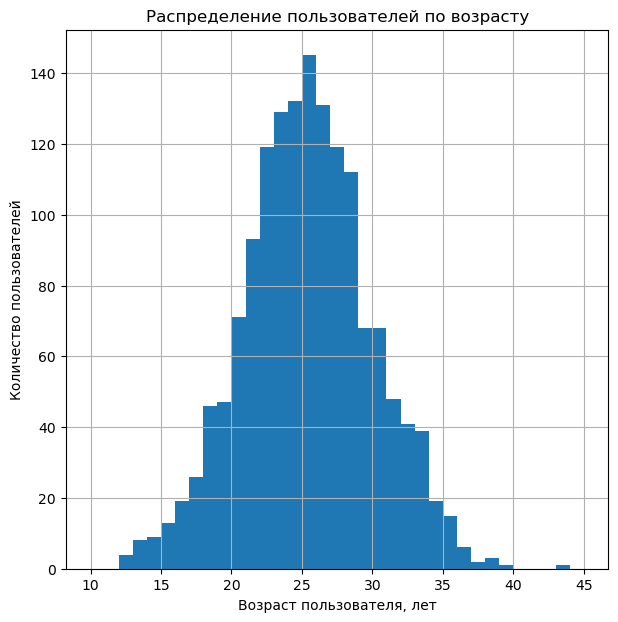

In [24]:
users_go['age'].plot(y = 'age', kind = 'hist', bins = 35, grid=True, figsize=(7,7), range=(10,45))
plt.xlabel("Возраст пользователя, лет")
plt.ylabel("Количество пользователей");
plt.title("Распределение пользователей по возрасту");

1. Гистограмма соответствует нормальному распределению данных. 
2. Самому юному пользователю сервиса &mdash; 12 лет. 
3. Наибольшее количество пользователей &mdash; молодые люди 25 лет. 
4. Самому старшему пользователю &mdash; 43 года.

<a id='step_4_4'></a>
### Расстояние, которое пользователь преодолел за одну поездку

In [25]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

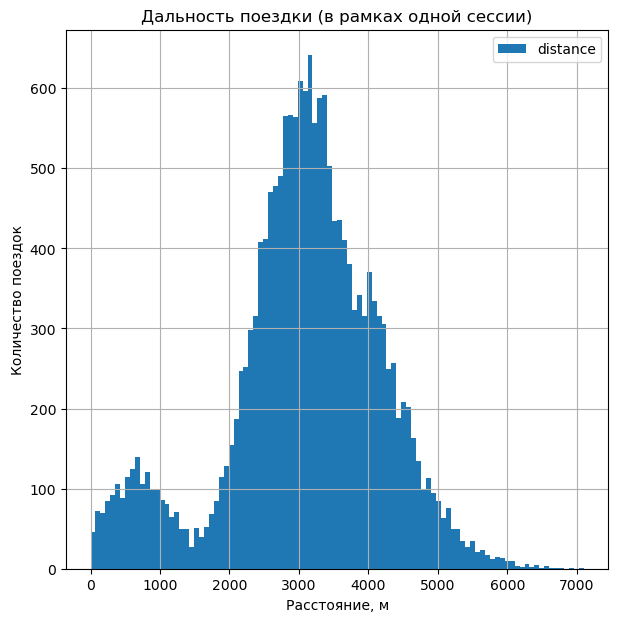

In [26]:
rides_go.plot(y = 'distance', kind = 'hist', bins = 100, grid=True, figsize = (7,7), range = (0,7100))
plt.xlabel("Расстояние, м")
plt.ylabel("Количество поездок");
plt.title("Дальность поездки (в рамках одной сессии)");

1. На гистограмме можно легко заметить две вершины, график соответствует **бимодальному распределению**. 
2. Можно разделить поездки на **две группы**: на короткие (от 0 до 1500 м) и длинные дистанции (от 1500 до 7000 м). 
3. Короткие поездки чаще всего совершались на дистанцию ~800 м, а длинные &mdash; ~3100 м.  

<a id='step_4_5'></a>
### Продолжительность поездок

In [27]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

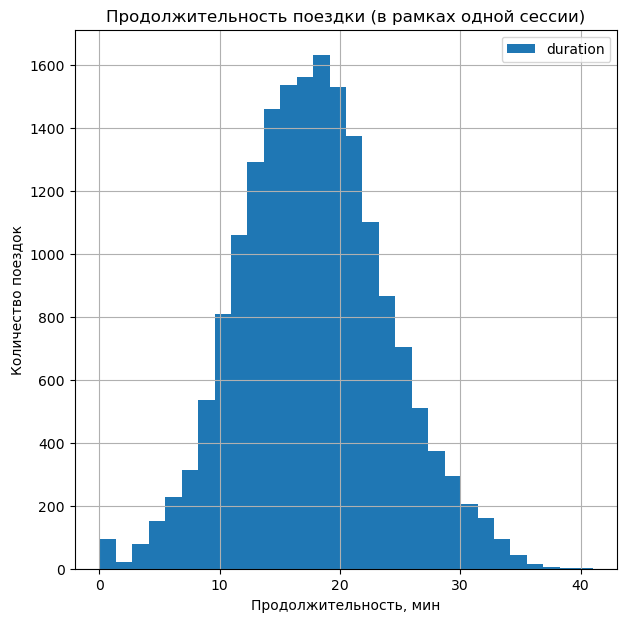

In [28]:
rides_go['duration'].describe()

rides_go.plot(y = 'duration', kind = 'hist', bins = 30, grid=True, figsize = (7,7), range = (0,41))
plt.xlabel("Продолжительность, мин")
plt.ylabel("Количество поездок");
plt.title("Продолжительность поездки (в рамках одной сессии)");

1. Гистограмма сооответствует нормальному распределению. 
2. Самая короткая поездка длилась 2 минуты
3. Самая длинная поездка заняла 40,8 минут.
4. Чаще всего поездка занимала ~18 минут. 

<a id='step_5'></a>
## Объединение данных

<a id='step_5_1'></a>
### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [29]:
#объединеним rides_go с users_go по столбцу user_id и запишем в переменную data
data = rides_go.merge(users_go, on='user_id')

print("Количество строк в объединенной таблице:",data.shape[0])
print("Количество cтолбцов в объединенной таблице:",data.shape[1])
data.head()

Количество строк в объединенной таблице: 18068
Количество cтолбцов в объединенной таблице: 9


,user_id,distance,duration,date,date_month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [30]:
#объединение data с subscriptions_go по столбцу subscription_type
data = data.merge(subscriptions_go, on='subscription_type')

print("Количество строк в объединенной таблице:",data.shape[0])
print("Количество cтолбцов в объединенной таблице:",data.shape[1])
data.head()

Количество строк в объединенной таблице: 18068
Количество cтолбцов в объединенной таблице: 12


,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [31]:
#округлим значения в столбце duration (продолжительность поездок) в большую сторону
data['duration'] = np.ceil(data['duration'])

<a id='step_5_2'></a>
### Создание датафреймов на основе объединённого: 

<a id='step_5_2_1'></a>
#### c данными о пользователях без подписки:

In [32]:
data_free = data.query('subscription_type=="free"')

print("Количество строк в таблице c данными о пользователях без подписки:", data_free.shape[0])
print("Количество строк в таблице c данными о пользователях без подписки", data_free.shape[1])
data_free.head()

Количество строк в таблице c данными о пользователях без подписки: 11568
Количество строк в таблице c данными о пользователях без подписки 12


,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free,8,50,0


<a id='step_5_2_2'></a>
#### с данными о пользователях с подпиской:

In [33]:
data_ultra = data.query('subscription_type=="ultra"')

print("Количество строк в таблице c данными о пользователях с подпиской:", data_ultra.shape[0])
print("Количество строк в таблице c данными о пользователях с подпиской:", data_ultra.shape[1])
data_ultra.head()

Количество строк в таблице c данными о пользователях с подпиской: 6500
Количество строк в таблице c данными о пользователях с подпиской: 12


,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


<a id='step_5_3'></a>
### Визуализирование информации о расстоянии и времени поездок

Построим графики распределений чтобы визуализировать информацию. Для удобного сравнения наложим их друг на друга: синий цветом показаны пользователи без подписки, персиковым &mdash; пользователи с подпиской.

Расстояние поездки:

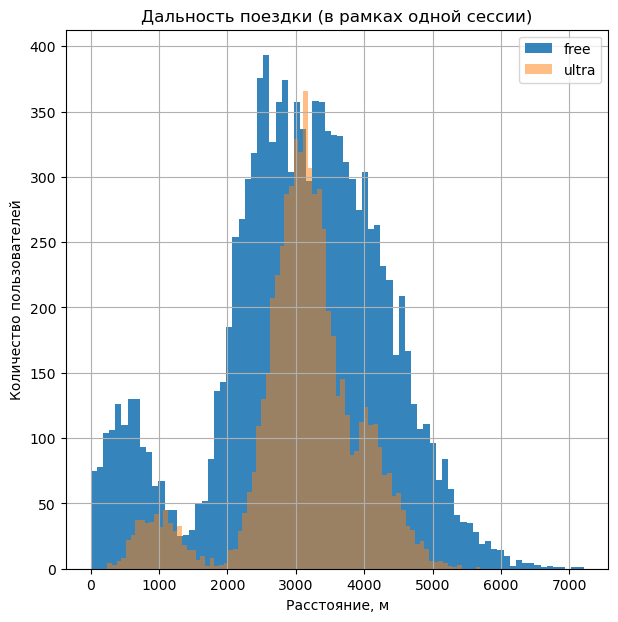

In [34]:
fig, ax = plt.subplots(1, 1)

ax.hist(data_free['distance'], bins=80, alpha=0.9, label='free')
ax.hist(data_ultra['distance'], bins=80, alpha=0.5, label='ultra')

plt.legend(['free', 'ultra'])
plt.xlabel("Расстояние, м")
plt.ylabel("Количество пользователей");
plt.title("Дальность поездки (в рамках одной сессии)");
plt.gcf().set_size_inches(7, 7)
plt.grid()
plt.show()

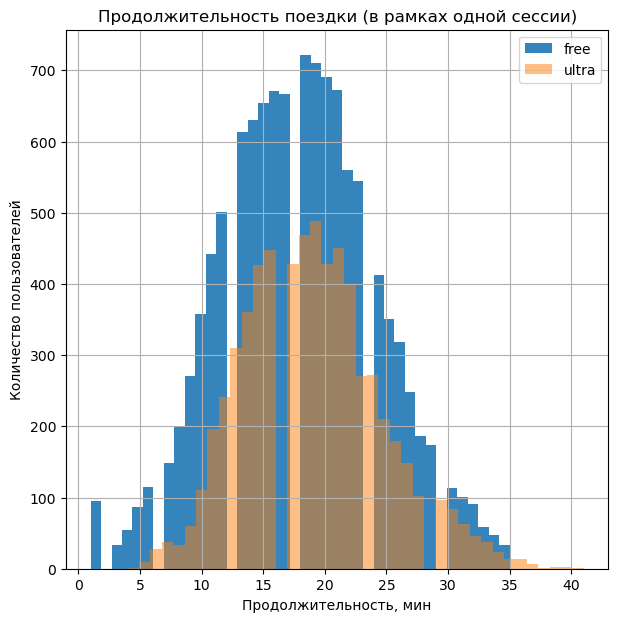

In [35]:
fig, ax = plt.subplots(1, 1)

ax.hist(data_free['duration'], bins=40, alpha=0.9, label='free')
ax.hist(data_ultra['duration'], bins=40, alpha=0.5, label='ultra')

plt.legend(['free', 'ultra'])
plt.xlabel("Продолжительность, мин")
plt.ylabel("Количество пользователей");
plt.title("Продолжительность поездки (в рамках одной сессии)");
plt.gcf().set_size_inches(7, 7)
plt.grid()
plt.show()

<a id='step_5_4'></a>
### Выводы

1. Количество поездок, совершенных пользователями без подписки превышает количество поездок, совершенных пользователями с подпиской (на&nbsp;43%), не смотря на то, что пользователей без подписки представлено в выборке лишь на 8,8% больше.
2. Пользователи с подпиской реже совершают короткие поездки. Это различие можно объяснить следующим образом: пользователь без подписки может совершить короткую поездку, чтобы протестировать сервис и решить, нужна ли ему подписка (ведь подписка выгодна, если пользоваться сервисом часто). 
3. По разному разделены короткие и длинные поездки: для пользователя без подписки короткой можно назвать поездку от 0 до 1500 м, а для пользователя с подпиской &mdash; от 0 до 2000 м. 
4. Гораздо более широкий купол у длинных поездок пользователей без подписки. Скорее всего, пользователь офрмляет подписку, чтобы совершать частые поездки из "точки А" в "точку B" (например, от станции метро до работы). Пользователи без подписки чаще совершают поездки на разные расстояния (например, в качестве прогулки).
5. Несмотря на близость времени средней поезки для обоих групп (для пользователей без подписки &mdash; 17 мин, для пользователей с подпиской &mdash; 19 мин), можно заметить, что купол распределения продолжительности поездки шире для пользователей без подписки. По аналогии с пунктом 3 вывода можно заключить, что пользователи без подписки совершают поездки разной длительности, в отличие от пользователей с подпиской.

<a id='step_6'></a>
## Подсчёт выручки

Создадим датафрейм `data_profit` с агрегированными данными о поездках на основе датафрейма `data` с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [36]:
#сгруппируем данные по id и номеру месяца, подсчитаем для каждой группы суммарное расстояние, количство поездок и суммарное время
data_profit = data.groupby(['user_id', 'date_month']).agg({'distance':['sum', 'count'],'duration':['sum'], 'subscription_type':['max']})

data_profit.columns = ['total_distance', 'number_of_trips', 'total_duration', 'subscription_type']
data_profit.head(20)


total_distance  number_of_trips  total_duration  \
user_id date_month                                                    
1       1              7027.511294                2            42.0   
        4               754.159807                1             7.0   
        8              6723.470560                2            46.0   
        10             5809.911100                2            32.0   
        11             7003.499363                3            56.0   
        12             6751.629942                2            28.0   
2       3             10187.723006                3            63.0   
        4              6164.381824                2            40.0   
        6              3255.338202                1            14.0   
        7              6780.722964                2            48.0   
        8               923.007439                1             7.0   
        10             2824.636598                1            19.0   
        12             3828.248580                1            12.0   
3       1              3061.777147                1            13.0   
        2              5421.152016                2            39.0   
        4              2956.651632                1            21.0   
        5              9064.026918                3            63.0   
        7             10919.595403                3            67.0   
        9              2891.012822                1            23.0   
        12             2593.381928                1            13.0   

                   subscription_type  
user_id date_month                    
1       1                      ultra  
        4                      ultra  
        8                      ultra  
        10                     ultra  
        11                     ultra  
        12                     ultra  
2       3                      ultra  
        4                      ultra  
        6                      ultra  
        7                      ultra  
        8                      ultra  
        10                     ultra  
        12                     ultra  
3       1                      ultra  
        2                      ultra  
        4                      ultra  
        5                      ultra  
        7                      ultra  
        9                      ultra  
        12                     ultra

Добавим в `data_profit` столбец с помесячной выручкой, которую принёс каждый пользователь. Помесячная выручка считается по формуле: (стоимость старта поездки &times;  количество поездок) + стоимость одной минуты поездки &times; общая продолжительность всех поездок в минутах) + стоимость подписки.

In [37]:
profits = []
for i in users_go['user_id']:
    for j in (data_profit.loc[i]).index.get_level_values(0):
        profit = 0
        subtype = data_profit.loc[i].loc[j]['subscription_type']
        profit = subscriptions_go.query('subscription_type==@subtype')['start_ride_price'].item() * data_profit.loc[i].loc[j]['number_of_trips'].item() + \
                 subscriptions_go.query('subscription_type==@subtype')['minute_price'].item() * data_profit.loc[i].loc[j]['total_duration'].item() + \
                 subscriptions_go.query('subscription_type==@subtype')['subscription_fee'].item()
        profits.append(profit)
data_profit['profits'] = profits        

In [38]:
data_profit.head(20)

total_distance  number_of_trips  total_duration  \
user_id date_month                                                    
1       1              7027.511294                2            42.0   
        4               754.159807                1             7.0   
        8              6723.470560                2            46.0   
        10             5809.911100                2            32.0   
        11             7003.499363                3            56.0   
        12             6751.629942                2            28.0   
2       3             10187.723006                3            63.0   
        4              6164.381824                2            40.0   
        6              3255.338202                1            14.0   
        7              6780.722964                2            48.0   
        8               923.007439                1             7.0   
        10             2824.636598                1            19.0   
        12             3828.248580                1            12.0   
3       1              3061.777147                1            13.0   
        2              5421.152016                2            39.0   
        4              2956.651632                1            21.0   
        5              9064.026918                3            63.0   
        7             10919.595403                3            67.0   
        9              2891.012822                1            23.0   
        12             2593.381928                1            13.0   

                   subscription_type  profits  
user_id date_month                             
1       1                      ultra    451.0  
        4                      ultra    241.0  
        8                      ultra    475.0  
        10                     ultra    391.0  
        11                     ultra    535.0  
        12                     ultra    367.0  
2       3                      ultra    577.0  
        4                      ultra    439.0  
        6                      ultra    283.0  
        7                      ultra    487.0  
        8                      ultra    241.0  
        10                     ultra    313.0  
        12                     ultra    271.0  
3       1                      ultra    277.0  
        2                      ultra    433.0  
        4                      ultra    325.0  
        5                      ultra    577.0  
        7                      ultra    601.0  
        9                      ultra    337.0  
        12                     ultra    277.0

<a id='step_7'></a>
## Проверка гипотез

Далее, для проверки гипотез, будем пользоваться t-тестами Стьюдента. В рамках каждого пункта будет формулироваться нулевая гипотеза и альтернативная гипотеза. По результатам теста примем решение: можно ли отвергнуть нулевую гипотезу или нет.

### Тратят ли пользователи с подпиской больше времени на поездки? 

Проверка нулевой гипотезы (в данном случае односторонней) о том, что две независимые выборки имеют одинаковые средние (ожидаемые) значения.

**Нулевая гипотеза**: средняя продолжительность поездки для двух групп пользователей равны.

**Альтернативная гипотеза**: среднее значение продолжительности поездки для пользователей с подпиской больше, чем средняя продолжительность поездки пользователей без подписки.

In [39]:
alpha = 0.05

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. **Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки**.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Проверка нулевой гипотезы (также односторонней) о том, что ожидаемое значение (среднее значение) выборки независимых наблюдений равно заданному среднему значению генеральной совокупности.

**Нулевая гипотеза**: средняя дальность поездки для пользователей с подпиской равна 3130 метрам.

**Альтернативная гипотеза**: средняя дальность поездки для пользователей с подпиской **больше** 3130 метров.

In [40]:
avg_distance_value = 3130

alpha = 0.05

results = st.ttest_1samp(data_ultra['distance'], avg_distance_value, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому отвергнуть нулевую гипотезу мы не можем. **Есть основания полагать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров**.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Проверка нулевой гипотезы (в данном случае односторонней) о том, что две независимые выборки имеют одинаковые средние (ожидаемые) значения.

**Нулевая гипотеза**: средняя помесяная выручка для двух групп пользователей будет равной.

**Альтернативная гипотеза**: средняя помесячная выручка от пользователей с подпиской больше, чем cредняя помесячная выручка от пользователей без подписки.

In [41]:
data_profit_free = data_profit.query('subscription_type == "free"')
data_profit_ultra = data_profit.query('subscription_type == "ultra"')

alpha = 0.05

results = st.ttest_ind(data_profit_ultra['profits'], data_profit_free['profits'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. **Есть основания говорить, что средняя помесячная выручка от пользователей с подпиской больше, чем cредняя помесячная выручка от пользователей без подписки.**.

### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Они хотят убедиться, что благодаря этому количество обращений в техподдержку значительно снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления серверов и после обновления. Какой тест понадобился бы для проверки этой гипотезы?

**Для проверки этой гипотезы понадобится t-тест Стьюдента для двух парных выборок.**

Гипотезы будут сформулированы следующим образом:  

**Нулевая гипотеза**: &mu;<sub>1</sub> = &mu;<sub>2</sub>

**Альтернативня гипотеза**: &mu;<sub>2</sub> &#8800; &mu;<sub>2</sub>

где &mu;<sub>1</sub> &mdash; среднее число обращений в техподдержку до обновления, &mu;<sub>2</sub> &mdash; среднее число обращений в техподдержку после обновления.

<code>results = st.ttest_rel(before, after)</code>, где <code>before</code> &mdash; выборка с данными о количестве обращений до обновления, а <code>after</code> &mdash; с данными о количестве обращений после обновления.

<a id='step_8'></a>
##  Распределения

1. Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

    Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Пользователь может воспользоваться или не воспользоваться промокодом (2 исхода) с заданной вероятностью. Акцию можно описать с помощью биномиального распределения, где вероятность успеха $p$ = 0.1. Промокодом должны воспользоваться как минимум 100 существующих клиентов. 

Вероятность провала акции: 0.04954795210203069


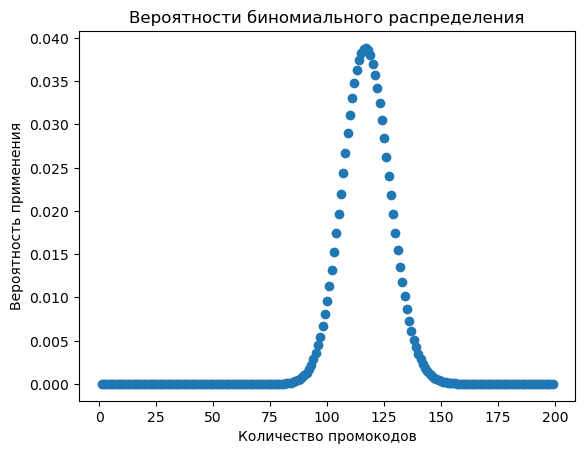

In [42]:
#задаём параметры биноминального распределения
n = 1172 #общее кол-во промокодов (найдено эмпирическим путём)
p = 0.1 #вероятность применения промокода

result = binom.cdf(100, n, p) # расчёт вероятности неудачи (активируют менее 100 промокодов)
print("Вероятность провала акции:", result)

x = list(range(1, 200))
plt.plot(x, binom.pmf(x, n, p), 'o');
plt.xlabel("Количество промокодов")
plt.ylabel("Вероятность применения");
plt.title("Вероятности биномиального распределения");

Для того, чтобы вероятность провала акции не превышала 5%, необходимо разослать **не менее 1172 промокодов**.

2. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть это уведомление или не открывать. Известно, что уведомления открывают около 40 % получивших их клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Пользователь может открыть или не открыть уведомление (2 исхода) с заданной вероятностью. Эта ситуация может быть описана с помощью биномиального распределения, где вероятность успеха $p$ = 0.4. Так как количество отвправленных уведомлений ($n$) велико, проксимируем биномльное распределение нормальным:

In [43]:
#задаём параметры биномильного распределения
n = 1000000 #общее кол-во push-уведомлений
p = 0.4 #вероятность открытия уведомления

#подсчёт параметров для нормального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

#задаём нормальное распределение
distr = st.norm(mu, sigma) 

result = distr.cdf(399500) # подсчёт вероятности
print("Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей:",result)

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 0.15371708296369768


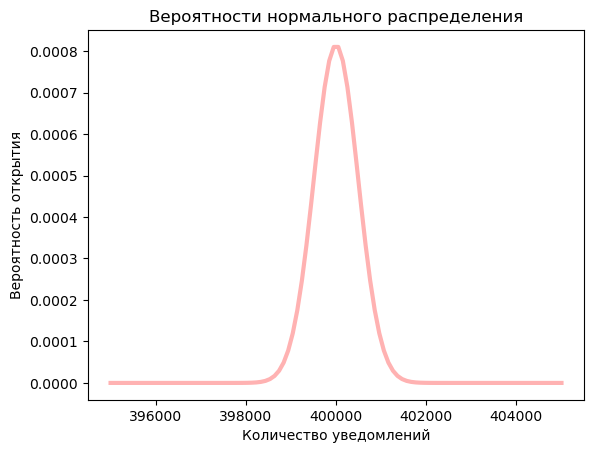

In [45]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

x = linspace(395000, 405000, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3)
plt.xlabel("Количество уведомлений")
plt.ylabel("Вероятность открытия")
plt.title("Вероятности нормального распределения");

По результатам оценки вероятность того, что уведомление откроют не более 399,5 тыс. пользователей **равна 15,4%**.

<a id='step_9'></a>
## Вывод

1. Тратят ли пользователи с подпиской больше времени на поездки?  

    **Да**, есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.  
  
                                                                           
2. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?    
  
    **Да**, есть основания полагать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.  
      
    
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?  
  
    **Да**, есть основания говорить, что средняя помесячная выручка от пользователей с подпиской больше, чем cредняя помесяная выручка от пользователей без подписки. 
      
    
4. Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Они хотят убедиться, что благодаря этому количество обращений в техподдержку значительно снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?  

    Для проверки этой гипотезы понадобится **t-тест Стьюдента для двух парных (зависимых) выборок**.  
      
    
5.  Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.    
    Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. 
      
    Для того, чтобы вероятность провала акции не превышала 5% необходимо разослать **не менее 1172 промокодов**.  
      

6. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть эти уведомления или не открывать. Известно, что уведомления открывают около 40% получивших их клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.  

    По результатам оценки вероятность того, что что уведомление откроют не более 399,5 тыс. пользователей равна **15%**.